In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
# #Leemos el índice S&P500, este será nuestro benchmark y lo adaptamos al formato del dato de las acciones de Yahoo Finance
benchmark_data = yf.Ticker('^GSPC').history(period='max')[['Close']]
benchmark_data.index = benchmark_data.index.strftime('%Y-%m-%d')

# Pedimos al usuario que ingrese la cantidad de acciones a analizar
n = int(input("¿Cuántas acciones desea analizar? "))

# Creamos un diccionario vacío para almacenar los datos de cada acción
datasets = {}

# Pedimos al usuario que ingrese el símbolo de cada acción y almacenamos los datos en el diccionario
for i in range(n):
    accion = input("Ingrese el símbolo de la acción {}:".format(i+1))
    ticker = yf.Ticker(accion)
    dataframe = ticker.history(period='max')
    dataframe.index = dataframe.index.strftime('%Y-%m-%d')
    datasets[accion] = pd.DataFrame(dataframe['Close'])

¿Cuántas acciones desea analizar? 5
Ingrese el símbolo de la acción 1:AAPL
Ingrese el símbolo de la acción 2:AMZN
Ingrese el símbolo de la acción 3:GOOGL
Ingrese el símbolo de la acción 4:MSFT
Ingrese el símbolo de la acción 5:META


In [3]:
#Corremos un bucle para reemplazar la columna Close, por el nombre de cada dataset
for name, df in datasets.items():
    df.rename(columns={'Close': name}, inplace=True)


#AAPL_stocks_df
AAPL = datasets['AAPL']

#AMZN_stocks_df
AMZN = datasets['AMZN']

#GOOGL_stocks_df
GOOGL = datasets['GOOGL']

#MSFT_stocks_df
MSFT = datasets['MSFT']

#META_stocks_df
META = datasets['META']

In [4]:
# Unir los datasets en el índice
stocks_data = AAPL.merge(AMZN, left_index=True, right_index=True)\
                  .merge(GOOGL, left_index=True, right_index=True)\
                  .merge(MSFT, left_index=True, right_index=True)\
                  .merge(META, left_index=True, right_index=True)

# Renombrar las columnas con los nombres de los datasets correspondientes


# Mostrar el resultado
print(stocks_data.head())

                 AAPL     AMZN      GOOGL       MSFT       META
Date                                                           
2012-05-18  16.122002  10.6925  15.025025  23.721565  38.230000
2012-05-21  17.061274  10.9055  15.368118  24.110579  34.029999
2012-05-22  16.930264  10.7665  15.035035  24.118685  31.000000
2012-05-23  17.343359  10.8640  15.251752  23.591894  32.000000
2012-05-24  17.184080  10.7620  15.106607  23.559473  33.029999


In [5]:
META.loc['2012-05-18':]

,META
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999
...,...
2023-04-21,212.889999
2023-04-24,212.789993
2023-04-25,207.550003


In [6]:
# Ingresar año de inicio y fin para filtrar los datos
start_year = str(input("Introduzca el año de inicio (en formato YYYY): "))
end_year = str(input("Introduzca el año de fin (en formato YYYY): "))

# Convertir los años del dataset 'stocks_data' de fecha para poder filtrar por rango de fechas
start_date_benchmark = start_year + '-01-01'
end_date_benchmark = end_year + '-12-31'

benchmark_data = benchmark_data.loc[start_date_benchmark:end_date_benchmark]

# Convertir los años del dataset 'stocks_data' de fecha para poder filtrar por rango de fechas
start_date_stocks = start_year + '-01-01'
end_date_stocks = end_year + '-12-31'

# Filtrar los datos por rango de fechas
stocks_data = stocks_data.loc[start_date_stocks:end_date_stocks]

Introduzca el año de inicio (en formato YYYY): 2016
Introduzca el año de fin (en formato YYYY): 2016


C:\Users\Usuario\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


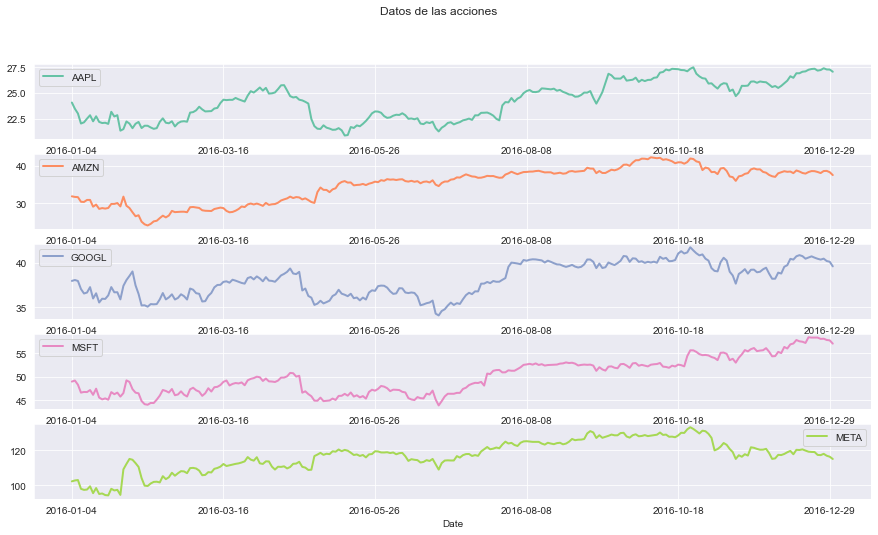

             AAPL        AMZN       GOOGL        MSFT        META
count  252.000000  252.000000  252.000000  252.000000  252.000000
mean    24.200999   34.976157   38.160661   50.136767  117.035873
std      1.876589    4.618116    1.870102    3.817245    8.899858
min     20.883032   24.103500   34.056999   43.927307   94.160004
25%     22.381528   30.346501   36.524375   46.682409  112.202499
50%     24.342082   36.393749   38.087500   49.616522  117.764999
75%     25.765307   38.394126   39.993249   52.716378  123.902502
max     27.482796   42.217999   41.786999   58.456940  133.279999


In [7]:
# Visualizamos los datos de las Acciones
fig, ax = plt.subplots(figsize=(15, 8))
stocks_data.plot(title='Datos de las acciones', subplots=True, lw=2, ax=ax)
plt.show()


# Datos estadísticos sumarios de las acciones
print(stocks_data.describe())

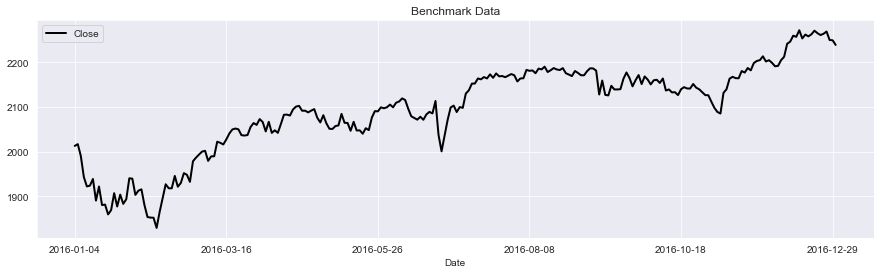

             Close
count   252.000000
mean   2094.651264
std     101.427614
min    1829.079956
25%    2047.059967
50%    2104.104980
75%    2169.075012
max    2271.719971


In [8]:
# Graficamos los datos de nuestra referencia (S&P 500)
fig, ax = plt.subplots(figsize=(15, 4))
benchmark_data.plot(title='Benchmark Data', lw=2, ax=ax, color='k')
plt.show()


# Datos estadísticos sumarios de (S&P 500)
print(benchmark_data.describe())

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


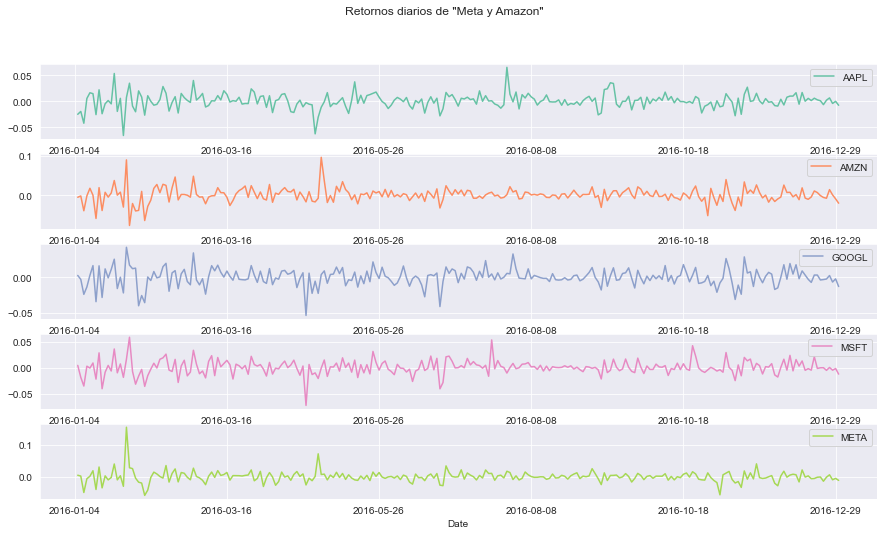

             AAPL        AMZN       GOOGL        MSFT        META
count  251.000000  251.000000  251.000000  251.000000  251.000000
mean     0.000574    0.000818    0.000249    0.000711    0.000626
std      0.014731    0.018383    0.012608    0.014300    0.017840
min     -0.065706   -0.076100   -0.054141   -0.071711   -0.058105
25%     -0.005780   -0.007210   -0.005528   -0.005884   -0.007220
50%      0.000891    0.000857    0.000255    0.000356    0.000879
75%      0.007734    0.009224    0.007168    0.007187    0.008108
max      0.064963    0.095664    0.042811    0.058202    0.155214


In [9]:
# Calculando el retorno diario de las acciones
stocks_returns = stocks_data.pct_change()

# Graficamos los retornos diarios
fig, ax = plt.subplots(figsize=(15, 8))
stocks_returns.plot(title='Retornos diarios de "Meta y Amazon"', lw=1.5, subplots=True, ax=ax)
plt.show()

# Datos estadísticos sumarios del RETORNO acciones
print(stocks_returns.describe())

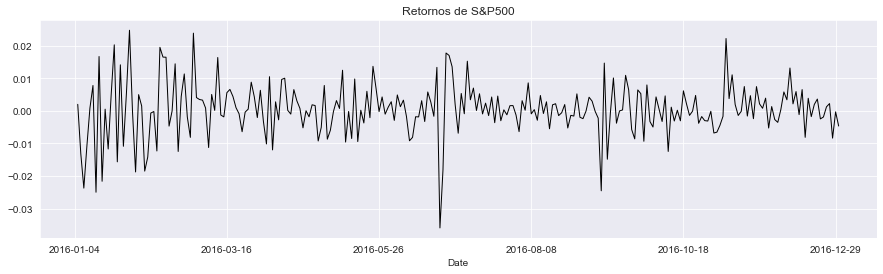

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: Close, dtype: float64


In [10]:
# Calculamos el retorno diario nuestra referencia (S&P 500)
sp_returns = benchmark_data['Close'].pct_change()

# Graficamos el retorno diario
plt.figure(figsize=(15,4))
sp_returns.plot(title='Retornos de S&P500', lw=1, color='k')
plt.show()

# Datos estadísticos sumarios del RETORNO de (S&P 500)
print(sp_returns.describe())

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


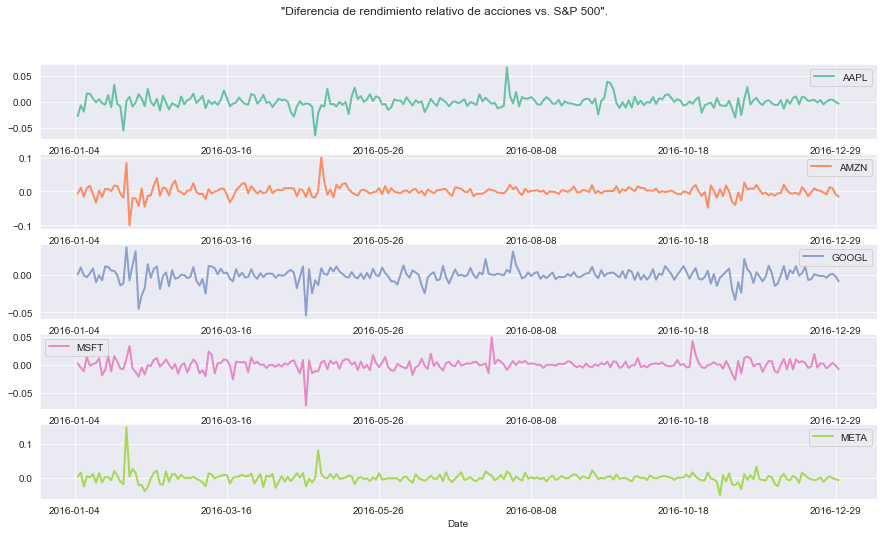

             AAPL        AMZN       GOOGL        MSFT        META
count  251.000000  251.000000  251.000000  251.000000  251.000000
mean     0.000116    0.000360   -0.000209    0.000253    0.000168
std      0.012103    0.016126    0.009856    0.010260    0.015439
min     -0.064227   -0.100860   -0.054189   -0.071758   -0.051958
25%     -0.005628   -0.006229   -0.004033   -0.004263   -0.005663
50%     -0.000100    0.000697    0.000162    0.000267   -0.000454
75%      0.005784    0.007351    0.004218    0.005189    0.005814
max      0.066162    0.100728    0.037282    0.048847    0.149686


In [11]:
# Calculando la diferencia RELATIVA entre las acciones y S&P500
excess_returns = stocks_returns.sub(sp_returns, axis=0)

# plot excess returns

fig, ax = plt.subplots(figsize=(15, 8))
excess_returns.plot(title='"Diferencia de rendimiento relativo de acciones vs. S&P 500".', lw=2, subplots=True, ax=ax)
plt.show()

# summarize excess returns
print(excess_returns.describe())


#### Paso 1:
<p> La diferencia promedio en las devoluciones diarias de las acciones frente al S&P 500
En este paso, se calcula la diferencia entre las devoluciones diarias de las acciones y las devoluciones diarias del S&P 500. Esto se llama "exceso de devoluciones". Luego se calcula el promedio de estas diferencias para obtener una idea de cuánto más o menos las acciones están rindiendo por día en comparación con el S&P 500.</p>

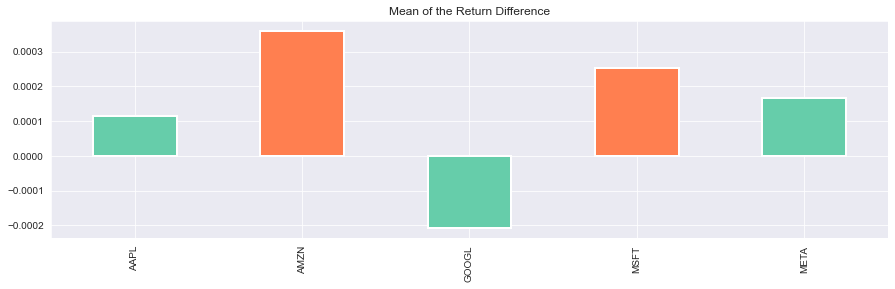

AAPL     0.000116
AMZN     0.000360
GOOGL   -0.000209
MSFT     0.000253
META     0.000168
dtype: float64


In [12]:
# Calculamos el promedio de la diferencia del retorno RELATIVO
avg_excess_return = excess_returns.mean()

# Graficamos
plt.figure(figsize=(15,4))
avg_excess_return.plot(kind='bar', title='Mean of the Return Difference', lw=2)
plt.show()

print(avg_excess_return)

#### Paso 2: 
<p>Desviación estándar de la diferencia de devolución
En este paso, se calcula la desviación estándar de las diferencias de devolución que se calcularon en el paso anterior. Esto mide cuánto más riesgo implica invertir en las acciones en comparación con el S&P 500.</p>

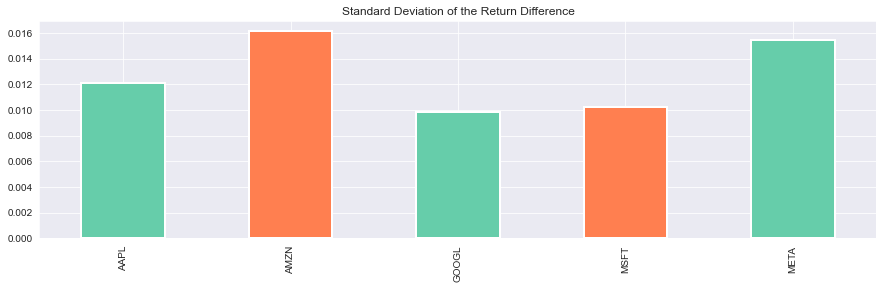

AAPL     0.012103
AMZN     0.016126
GOOGL    0.009856
MSFT     0.010260
META     0.015439
dtype: float64


In [13]:
# Calculamos las desviaciones std.
sd_excess_return = excess_returns.std()

# Graficamos
plt.figure(figsize=(15,4))
sd_excess_return.plot(kind='bar', title='Standard Deviation of the Return Difference', lw=2, color=['mediumaquamarine','coral'])
plt.show()

print(sd_excess_return)

#### Calculando el Sharpe Ratio

<p>Primero se divide el promedio de las diferencias de devolución (calculado en el paso 1) por la desviación estándar de las diferencias de devolución (calculado en el paso 2). El resultado es el Ratio de Sharpe, que indica cuánto más o menos retorno tiene la oportunidad de inversión considerada por unidad de riesgo.</p> <br>
<p>Luego el Ratio de Sharpe se anualiza multiplicándolo por la raíz cuadrada del número de períodos (en este caso, días de negociación) en un año. Esto hace que sea más fácil comparar el Ratio de Sharpe entre diferentes inversiones y en diferentes períodos de tiempo.</p>

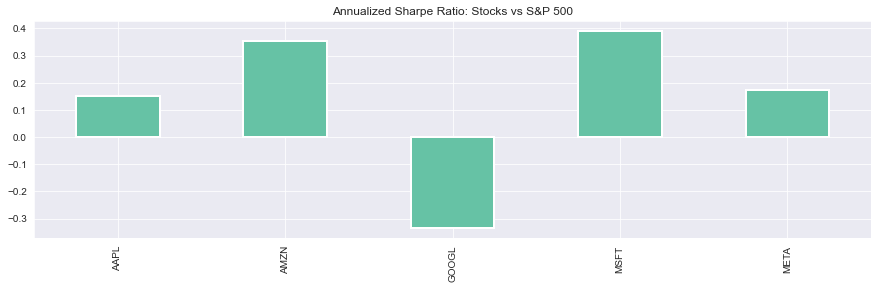

Sharpe Ratio diario: 

 AAPL     0.009550
AMZN     0.022318
GOOGL   -0.021194
MSFT     0.024645
META     0.010856
dtype: float64 

Sharpe Ratio anualizado: 

 AAPL     0.151596
AMZN     0.354282
GOOGL   -0.336448
MSFT     0.391222
META     0.172329
dtype: float64


In [15]:
# Calculamos el Sharpe Ratio diario
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# Anualizamos
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# Graficamos el Ratio anualizado
plt.figure(figsize=(15,4))
annual_sharpe_ratio.plot(kind='bar', title='Annualized Sharpe Ratio: Stocks vs S&P 500', lw=2)
plt.show()

print(f'Sharpe Ratio diario: \n\n {daily_sharpe_ratio} \n')
print(f'Sharpe Ratio anualizado: \n\n {annual_sharpe_ratio}')

Los valores del índice de Sharpe diario para 'Meta' y 'Amazon' son 0.010856 y 0.022318, respectivamente. Esto indica que **'Amazon' ha tenido un mejor rendimiento ajustado al riesgo en comparación con 'Meta' en un día en particular.** Es decir, **'Amazon' ha generado una rentabilidad relativamente alta en relación con el riesgo asumido en ese día.**

Por otro lado, los valores del índice de Sharpe anualizado para 'Meta' y 'Amazon' son 0.172329 y 0.354282, respectivamente. Esto indica que **'Amazon' ha tenido un mejor rendimiento ajustado al riesgo en comparación con 'Meta' durante un período de un año.** Es decir, **'Amazon' ha generado una rentabilidad relativamente alta en relación con el riesgo asumido durante un año.**

En resumen, según los resultados obtenidos, **'Amazon' ha tenido un mejor desempeño ajustado al riesgo en comparación con 'Meta' tanto en un período diario como anualizado**.

En resumen, para calcular el índice de Sharpe en series de tiempo, se debe utilizar un enfoque de ventana móvil para reflejar los cambios en la rentabilidad y la volatilidad a lo largo del tiempo, y se debe seleccionar una tasa libre de riesgo que refleje el período de tiempo en el que se está haciendo el cálculo.